In [7]:
import requests

# Define the API endpoint and parameters
url = "https://datasets-server.huggingface.co/rows"
params = {
    "dataset": "SetFit/enron_spam",
    "config": "default",
    "split": "test",
    "offset": 0,
    "length": 100
}

# Make GET request to fetch the dataset
response = requests.get(url, params=params)

# Check if request was successful
if response.status_code != 200:
    print(f"Failed to fetch dataset. Status code: {response.status_code}")
    exit()

# Print the JSON response to understand its structure
json_response = response.json()
print(json_response)


{'features': [{'feature_idx': 0, 'name': 'message_id', 'type': {'dtype': 'int64', '_type': 'Value'}}, {'feature_idx': 1, 'name': 'text', 'type': {'dtype': 'string', '_type': 'Value'}}, {'feature_idx': 2, 'name': 'label', 'type': {'dtype': 'int64', '_type': 'Value'}}, {'feature_idx': 3, 'name': 'label_text', 'type': {'dtype': 'string', '_type': 'Value'}}, {'feature_idx': 4, 'name': 'subject', 'type': {'dtype': 'string', '_type': 'Value'}}, {'feature_idx': 5, 'name': 'message', 'type': {'dtype': 'string', '_type': 'Value'}}, {'feature_idx': 6, 'name': 'date', 'type': {'dtype': 'timestamp[s]', '_type': 'Value'}}], 'rows': [{'row_idx': 0, 'row': {'message_id': 31329, 'text': 'expande tu imagen ! ! ! ! ! ! ! ! ! si no puede ver este mail , entre a : http : / / www . supermedios . com / admin / mailing / proyecto . php ? id = 160\neste mensaje se enva bajo los artculos 2 y 4 de la ley\n19 . 628 y 28 b de la ley 19 . 955 de la constitucin de la repblica\nde chile actualizada el 14 de julio 20

In [13]:
import pandas as pd
import requests
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define the API endpoint and parameters
url = "https://datasets-server.huggingface.co/rows"
params = {
    "dataset": "SetFit/enron_spam",
    "config": "default",
    "split": "test",
    "offset": 0,
    "length": 100
}

# Make GET request to fetch the dataset
response = requests.get(url, params=params)

# Check if request was successful
if response.status_code != 200:
    print(f"Failed to fetch dataset. Status code: {response.status_code}")
    exit()

# Load dataset into a DataFrame
json_response = response.json()

# Extract rows from the response
rows = json_response['rows']
data = [row['row'] for row in rows]
email_df = pd.DataFrame(data)

# Display first few rows to understand the structure
print(email_df.head())

# Convert 'date' column to datetime, handle errors by setting invalid parsing as NaT (Not a Time)
email_df['date'] = pd.to_datetime(email_df['date'], errors='coerce')

# Drop rows where 'date' could not be parsed
email_df = email_df.dropna(subset=['date'])

# Extract day of the week and month from the 'date' column
email_df['DayOfWeek'] = email_df['date'].dt.dayofweek
email_df['Month'] = email_df['date'].dt.month

# Function to extract features
def extract_features(df):
    # Extract day of the week and month as features
    features = df[['DayOfWeek', 'Month']]
    return features

# Extract features
X = extract_features(email_df)
y = email_df['label_text'].map({'spam': 1, 'ham': 0})

# Drop any rows in X or y that have missing values
X = X.dropna()
y = y.loc[X.index]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a classifier (Random Forest as an example)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print temporal patterns
print("\nTemporal Patterns (Day of the Week):")
print(X_test['DayOfWeek'].head())

print("\nTemporal Patterns (Month):")
print(X_test['Month'].head())


   message_id                                               text  label  \
0       31329  expande tu imagen ! ! ! ! ! ! ! ! ! si no pued...      1   
1        3969  paliourg learning for life enlarge your member...      1   
2       27070  cure premature ejaculation hello ,\ndid you ej...      1   
3        2779  re : noms / actual flow for 3 / 19 / 01 we agr...      0   
4        2949  ehronline web address change this message is i...      0   

  label_text                                  subject  \
0       spam      expande tu imagen ! ! ! ! ! ! ! ! !   
1       spam               paliourg learning for life   
2       spam               cure premature ejaculation   
3        ham  re : noms / actual flow for 3 / 19 / 01   
4        ham             ehronline web address change   

                                             message                 date  
0  si no puede ver este mail , entre a : http : /...  2005-01-19T00:00:00  
1  enlarge your member\nzenextend enlargement pil...  

In [6]:
import pandas as pd
import requests
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define the API endpoint and parameters
url = "https://datasets-server.huggingface.co/rows"
params = {
    "dataset": "SetFit/enron_spam",
    "config": "default",
    "split": "test",
    "offset": 0,
    "length": 100
}

# Make GET request to fetch the dataset
response = requests.get(url, params=params)

# Check if request was successful
if response.status_code != 200:
    print(f"Failed to fetch dataset. Status code: {response.status_code}")
    exit()

# Load dataset into a DataFrame
json_response = response.json()

# Extract rows from the response
rows = json_response['rows']
data = [row['row'] for row in rows]
email_df = pd.DataFrame(data)

# Display first few rows to understand the structure
print(email_df.head())

# Convert 'date' column to datetime, handle errors by setting invalid parsing as NaT (Not a Time)
email_df['date'] = pd.to_datetime(email_df['date'], errors='coerce')

# Drop rows where 'date' could not be parsed
email_df = email_df.dropna(subset=['date'])

# Extract day of the week and month from the 'date' column
email_df['DayOfWeek'] = email_df['date'].dt.dayofweek
email_df['Month'] = email_df['date'].dt.month

# Function to extract features
def extract_features(df):
    # Extract day of the week and month as features
    features = df[['DayOfWeek', 'Month']]
    return features

# Extract features
X = extract_features(email_df)
y = email_df['label_text'].map({'spam': 1, 'ham': 0})

# Drop any rows in X or y that have missing values
X = X.dropna()
y = y.loc[X.index]

# Print the content of the first spam email
first_spam_email_idx = y[y == 1].index[0]  # Find the index of the first spam email
first_spam_email_content = email_df.loc[first_spam_email_idx, 'message']
print("\nFirst Spam Email Content:\n")
print(first_spam_email_content)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a classifier (Random Forest as an example)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

# Print temporal patterns
print("\nTemporal Patterns (Day of the Week):")
print(X_test['DayOfWeek'].head())

print("\nTemporal Patterns (Month):")
print(X_test['Month'].head())


   message_id                                               text  label  \
0       31329  expande tu imagen ! ! ! ! ! ! ! ! ! si no pued...      1   
1        3969  paliourg learning for life enlarge your member...      1   
2       27070  cure premature ejaculation hello ,\ndid you ej...      1   
3        2779  re : noms / actual flow for 3 / 19 / 01 we agr...      0   
4        2949  ehronline web address change this message is i...      0   

  label_text                                  subject  \
0       spam      expande tu imagen ! ! ! ! ! ! ! ! !   
1       spam               paliourg learning for life   
2       spam               cure premature ejaculation   
3        ham  re : noms / actual flow for 3 / 19 / 01   
4        ham             ehronline web address change   

                                             message                 date  
0  si no puede ver este mail , entre a : http : /...  2005-01-19T00:00:00  
1  enlarge your member\nzenextend enlargement pil...  

In [14]:
import pandas as pd
import requests
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define the API endpoint and parameters
url = "https://datasets-server.huggingface.co/rows"
params = {
    "dataset": "SetFit/enron_spam",
    "config": "default",
    "split": "test",
    "offset": 0,
    "length": 100
}

# Make GET request to fetch the dataset
response = requests.get(url, params=params)

# Check if request was successful
if response.status_code != 200:
    print(f"Failed to fetch dataset. Status code: {response.status_code}")
    exit()

# Load dataset into a DataFrame
json_response = response.json()

# Extract rows from the response
rows = json_response['rows']
data = [row['row'] for row in rows]
email_df = pd.DataFrame(data)

# Display first few rows to understand the structure
print(email_df.head())

# Convert 'date' column to datetime, handle errors by setting invalid parsing as NaT (Not a Time)
email_df['date'] = pd.to_datetime(email_df['date'], errors='coerce')

# Drop rows where 'date' could not be parsed
email_df = email_df.dropna(subset=['date'])

# Extract day of the week and month from the 'date' column
email_df['DayOfWeek'] = email_df['date'].dt.dayofweek
email_df['Month'] = email_df['date'].dt.month

# Additional feature: length of the subject
email_df['SubjectLength'] = email_df['subject'].apply(lambda x: len(str(x)) if pd.notna(x) else 0)

# Additional feature: presence of common spam words in subject
spam_keywords = ['free', 'win', 'winner', 'prize', 'urgent', 'important', 'buy', 'purchase']
email_df['SpamWords'] = email_df['subject'].apply(lambda x: sum([1 for word in spam_keywords if word in str(x).lower()]))

# Function to extract features
def extract_features(df):
    # Extract day of the week, month, subject length, and spam words as features
    features = df[['DayOfWeek', 'Month', 'SubjectLength', 'SpamWords']]
    return features

# Extract features
X = extract_features(email_df)
y = email_df['label_text'].map({'spam': 1, 'ham': 0})

# Drop any rows in X or y that have missing values
X = X.dropna()
y = y.loc[X.index]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a classifier (Random Forest as an example)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Perform cross-validation
cv_scores = cross_val_score(clf, X, y, cv=5)
print("Cross-validation accuracy scores:", cv_scores)
print("Mean cross-validation accuracy:", cv_scores.mean())

# Print temporal patterns
print("\nTemporal Patterns (Day of the Week):")
print(X_test['DayOfWeek'].value_counts().sort_index())

print("\nTemporal Patterns (Month):")
print(X_test['Month'].value_counts().sort_index())


   message_id                                               text  label  \
0       31329  expande tu imagen ! ! ! ! ! ! ! ! ! si no pued...      1   
1        3969  paliourg learning for life enlarge your member...      1   
2       27070  cure premature ejaculation hello ,\ndid you ej...      1   
3        2779  re : noms / actual flow for 3 / 19 / 01 we agr...      0   
4        2949  ehronline web address change this message is i...      0   

  label_text                                  subject  \
0       spam      expande tu imagen ! ! ! ! ! ! ! ! !   
1       spam               paliourg learning for life   
2       spam               cure premature ejaculation   
3        ham  re : noms / actual flow for 3 / 19 / 01   
4        ham             ehronline web address change   

                                             message                 date  
0  si no puede ver este mail , entre a : http : /...  2005-01-19T00:00:00  
1  enlarge your member\nzenextend enlargement pil...  

In [2]:
import pandas as pd
import requests
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, classification_report

# Define the API endpoint and parameters
url = "https://datasets-server.huggingface.co/rows"
params = {
    "dataset": "SetFit/enron_spam",
    "config": "default",
    "split": "test",
    "offset": 0,
    "length": 100
}

# Make GET request to fetch the dataset
response = requests.get(url, params=params)

# Check if request was successful
if response.status_code != 200:
    print(f"Failed to fetch dataset. Status code: {response.status_code}")
    exit()

# Load dataset into a DataFrame
json_response = response.json()
rows = json_response['rows']
data = [row['row'] for row in rows]
email_df = pd.DataFrame(data)

# Convert 'date' column to datetime, handle errors by setting invalid parsing as NaT (Not a Time)
email_df['date'] = pd.to_datetime(email_df['date'], errors='coerce')

# Drop rows where 'date' could not be parsed
email_df = email_df.dropna(subset=['date'])

# Extract day of the week and month from the 'date' column
email_df['DayOfWeek'] = email_df['date'].dt.dayofweek
email_df['Month'] = email_df['date'].dt.month

# Additional feature: length of the subject
email_df['SubjectLength'] = email_df['subject'].apply(lambda x: len(str(x)) if pd.notna(x) else 0)

# Additional feature: presence of common spam words in subject
spam_keywords = ['free', 'win', 'winner', 'prize', 'urgent', 'important', 'buy', 'purchase']
email_df['SpamWords'] = email_df['subject'].apply(lambda x: sum([1 for word in spam_keywords if word in str(x).lower()]))

# Function to extract features
def extract_features(df):
    # Extract day of the week, month, subject length, and spam words as features
    features = df[['DayOfWeek', 'Month', 'SubjectLength', 'SpamWords']]
    return features

# Extract features
X = extract_features(email_df)
y = email_df['label_text'].map({'spam': 1, 'ham': 0})

# Drop any rows in X or y that have missing values
X = X.dropna()
y = y.loc[X.index]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Adjusted parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1]
}

# Reduced cross-validation folds
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

# Print best parameters and best score from Grid Search
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation Accuracy:", grid_search.best_score_)

# Train a RandomForestClassifier using the best parameters
best_rf_clf = grid_search.best_estimator_
best_rf_clf.fit(X_train, y_train)

# Make predictions
y_pred = best_rf_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Test Set Precision:", precision)

# Perform cross-validation to get a more robust estimate of accuracy
cv_scores = cross_val_score(best_rf_clf, X, y, cv=13)
print("Cross-validation accuracy scores:", cv_scores)
print("Mean cross-validation accuracy:", cv_scores.mean())

# Print temporal patterns
print("\nTemporal Patterns (Day of the Week):")
print(X_test['DayOfWeek'].value_counts().sort_index())

print("\nTemporal Patterns (Month):")
print(X_test['Month'].value_counts().sort_index())

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best Cross-validation Accuracy: 0.675
Test Set Accuracy: 0.6
Test Set Precision: 0.5
Cross-validation accuracy scores: [0.625      0.625      0.625      0.625      0.5        0.875
 0.375      0.375      0.5        0.42857143 0.57142857 0.42857143
 0.85714286]
Mean cross-validation accuracy: 0.570054945054945

Temporal Patterns (Day of the Week):
DayOfWeek
0    4
1    4
2    5
3    1
4    5
6    1
Name: count, dtype: int64

Temporal Patterns (Month):
Month
1     2
2     2
3     3
4     2
5     1
6     2
7     3
8     2
10    1
11    1
12    1
Name: count, dtype: int64

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.75      0.69        12
           1       0.50      0.38      0.43         8

    accuracy                           0.60        20
   macro avg       0.57      0.56      0.56        20
weighted avg       0.59  

In [30]:
import pandas as pd
import requests
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define the API endpoint and parameters
url = "https://datasets-server.huggingface.co/rows"
params = {
    "dataset": "SetFit/enron_spam",
    "config": "default",
    "split": "test",
    "offset": 0,
    "length": 100
}

# Make GET request to fetch the dataset
response = requests.get(url, params=params)

# Check if request was successful
if response.status_code != 200:
    print(f"Failed to fetch dataset. Status code: {response.status_code}")
    exit()

# Load dataset into a DataFrame
json_response = response.json()

# Extract rows from the response
rows = json_response['rows']
data = [row['row'] for row in rows]
email_df = pd.DataFrame(data)

# Convert 'date' column to datetime, handle errors by setting invalid parsing as NaT (Not a Time)
email_df['date'] = pd.to_datetime(email_df['date'], errors='coerce')

# Drop rows where 'date' could not be parsed
email_df = email_df.dropna(subset=['date'])

# Extract day of the week and month from the 'date' column
email_df['DayOfWeek'] = email_df['date'].dt.dayofweek
email_df['Month'] = email_df['date'].dt.month

# Additional feature: length of the subject
email_df['SubjectLength'] = email_df['subject'].apply(lambda x: len(str(x)) if pd.notna(x) else 0)

# Additional feature: presence of common spam words in subject
spam_keywords = ['free', 'win', 'winner', 'prize', 'urgent', 'important', 'buy', 'purchase']
email_df['SpamWords'] = email_df['subject'].apply(lambda x: sum([1 for word in spam_keywords if word in str(x).lower()]))

# Function to extract features
def extract_features(df):
    # Extract day of the week, month, subject length, and spam words as features
    features = df[['DayOfWeek', 'Month', 'SubjectLength', 'SpamWords']]
    return features

# Extract features
X = extract_features(email_df)
y = email_df['label_text'].map({'spam': 1, 'ham': 0})

# Drop any rows in X or y that have missing values
X = X.dropna()
y = y.loc[X.index]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a classifier (Random Forest as an example)
clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Perform cross-validation
cv_scores = cross_val_score(clf, X, y, cv=5)
print("Cross-validation accuracy scores:", cv_scores)
print("Mean cross-validation accuracy:", cv_scores.mean())

# Print temporal patterns
print("\nTemporal Patterns (Day of the Week):")
print(X_test['DayOfWeek'].value_counts().sort_index())

print("\nTemporal Patterns (Month):")
print(X_test['Month'].value_counts().sort_index())


Accuracy: 0.55
Cross-validation accuracy scores: [0.45 0.7  0.6  0.45 0.5 ]
Mean cross-validation accuracy: 0.54

Temporal Patterns (Day of the Week):
DayOfWeek
0    4
1    4
2    5
3    1
4    5
6    1
Name: count, dtype: int64

Temporal Patterns (Month):
Month
1     2
2     2
3     3
4     2
5     1
6     2
7     3
8     2
10    1
11    1
12    1
Name: count, dtype: int64


In [31]:
import pandas as pd
import requests
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define the API endpoint and parameters
url = "https://datasets-server.huggingface.co/rows"
params = {
    "dataset": "SetFit/enron_spam",
    "config": "default",
    "split": "test",
    "offset": 0,
    "length": 100
}

# Make GET request to fetch the dataset
response = requests.get(url, params=params)

# Check if request was successful
if response.status_code != 200:
    print(f"Failed to fetch dataset. Status code: {response.status_code}")
    exit()

# Load dataset into a DataFrame
json_response = response.json()

# Extract rows from the response
rows = json_response['rows']
data = [row['row'] for row in rows]
email_df = pd.DataFrame(data)

# Convert 'date' column to datetime, handle errors by setting invalid parsing as NaT (Not a Time)
email_df['date'] = pd.to_datetime(email_df['date'], errors='coerce')

# Drop rows where 'date' could not be parsed
email_df = email_df.dropna(subset=['date'])

# Extract day of the week and month from the 'date' column
email_df['DayOfWeek'] = email_df['date'].dt.dayofweek
email_df['Month'] = email_df['date'].dt.month

# Additional feature: length of the subject
email_df['SubjectLength'] = email_df['subject'].apply(lambda x: len(str(x)) if pd.notna(x) else 0)

# Additional feature: presence of common spam words in subject
spam_keywords = ['free', 'win', 'winner', 'prize', 'urgent', 'important', 'buy', 'purchase']
email_df['SpamWords'] = email_df['subject'].apply(lambda x: sum([1 for word in spam_keywords if word in str(x).lower()]))

# Function to extract features
def extract_features(df):
    # Extract day of the week, month, subject length, and spam words as features
    features = df[['DayOfWeek', 'Month', 'SubjectLength', 'SpamWords']]
    return features

# Extract features
X = extract_features(email_df)
y = email_df['label_text'].map({'spam': 1, 'ham': 0})

# Drop any rows in X or y that have missing values
X = X.dropna()
y = y.loc[X.index]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)

# Make predictions
y_pred = lr.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Perform cross-validation
cv_scores = cross_val_score(lr, X, y, cv=5)
print("Cross-validation accuracy scores:", cv_scores)
print("Mean cross-validation accuracy:", cv_scores.mean())


Accuracy: 0.7
Cross-validation accuracy scores: [0.7  0.75 0.5  0.6  0.6 ]
Mean cross-validation accuracy: 0.63


In [3]:
import pandas as pd
import requests
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, classification_report

# Define the API endpoint and parameters
url = "https://datasets-server.huggingface.co/rows"
params = {
    "dataset": "SetFit/enron_spam",
    "config": "default",
    "split": "test",
    "offset": 0,
    "length": 100
}

# Make GET request to fetch the dataset
response = requests.get(url, params=params)

# Check if request was successful
if response.status_code != 200:
    print(f"Failed to fetch dataset. Status code: {response.status_code}")
    exit()

# Load dataset into a DataFrame
json_response = response.json()

# Extract rows from the response
rows = json_response['rows']
data = [row['row'] for row in rows]
email_df = pd.DataFrame(data)

# Convert 'date' column to datetime, handle errors by setting invalid parsing as NaT (Not a Time)
email_df['date'] = pd.to_datetime(email_df['date'], errors='coerce')

# Drop rows where 'date' could not be parsed
email_df = email_df.dropna(subset=['date'])

# Extract day of the week and month from the 'date' column
email_df['DayOfWeek'] = email_df['date'].dt.dayofweek
email_df['Month'] = email_df['date'].dt.month

# Additional feature: length of the subject
email_df['SubjectLength'] = email_df['subject'].apply(lambda x: len(str(x)) if pd.notna(x) else 0)

# Additional feature: presence of common spam words in subject
spam_keywords = ['free', 'win', 'winner', 'prize', 'urgent', 'important', 'buy', 'purchase']
email_df['SpamWords'] = email_df['subject'].apply(lambda x: sum([1 for word in spam_keywords if word in str(x).lower()]))

# Function to extract features
def extract_features(df):
    # Extract day of the week, month, subject length, and spam words as features
    features = df[['DayOfWeek', 'Month', 'SubjectLength', 'SpamWords']]
    return features

# Extract features
X = extract_features(email_df)
y = email_df['label_text'].map({'spam': 1, 'ham': 0})

# Drop any rows in X or y that have missing values
X = X.dropna()
y = y.loc[X.index]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
log_reg = LogisticRegression(random_state=42)
svm_clf = SVC(kernel='linear', random_state=42)
rf_clf = RandomForestClassifier(random_state=42)

# Initialize Voting Classifier ensemble
voting_clf = VotingClassifier(
    estimators=[('lr', log_reg), ('svm', svm_clf), ('rf', rf_clf)],
    voting='hard'  # Use 'hard' voting for majority rule voting
)

# Train the models
models = [log_reg, svm_clf, rf_clf, voting_clf]
for model in models:
    model.fit(X_train, y_train)

# Evaluate each model
for model in models:
    model_name = model.__class__.__name__
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy}")
    print(f"{model_name} Precision: {precision}")
    print(classification_report(y_test, y_pred))

# Perform cross-validation for the ensemble model
cv_scores = cross_val_score(voting_clf, X, y, cv=5, scoring='accuracy')
print("Voting Classifier Cross-validation accuracy scores:", cv_scores)
print("Mean cross-validation accuracy:", cv_scores.mean())

# Print temporal patterns
print("\nTemporal Patterns (Day of the Week):")
print(X_test['DayOfWeek'].value_counts().sort_index())

print("\nTemporal Patterns (Month):")
print(X_test['Month'].value_counts().sort_index())


LogisticRegression Accuracy: 0.7
LogisticRegression Precision: 0.625
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        12
           1       0.62      0.62      0.62         8

    accuracy                           0.70        20
   macro avg       0.69      0.69      0.69        20
weighted avg       0.70      0.70      0.70        20

SVC Accuracy: 0.7
SVC Precision: 0.6666666666666666
              precision    recall  f1-score   support

           0       0.71      0.83      0.77        12
           1       0.67      0.50      0.57         8

    accuracy                           0.70        20
   macro avg       0.69      0.67      0.67        20
weighted avg       0.70      0.70      0.69        20

RandomForestClassifier Accuracy: 0.6
RandomForestClassifier Precision: 0.5
              precision    recall  f1-score   support

           0       0.64      0.75      0.69        12
           1       0.50      0.38      0.

Accuracy: 0.6
Cross-validation accuracy scores: [0.55 0.7  0.6  0.5  0.5 ]
Mean cross-validation accuracy: 0.5700000000000001

Temporal Patterns (Day of the Week):
DayOfWeek
0    4
1    4
2    5
3    1
4    5
6    1
Name: count, dtype: int64

Temporal Patterns (Month):
Month
1     2
2     2
3     3
4     2
5     1
6     2
7     3
8     2
10    1
11    1
12    1
Name: count, dtype: int64


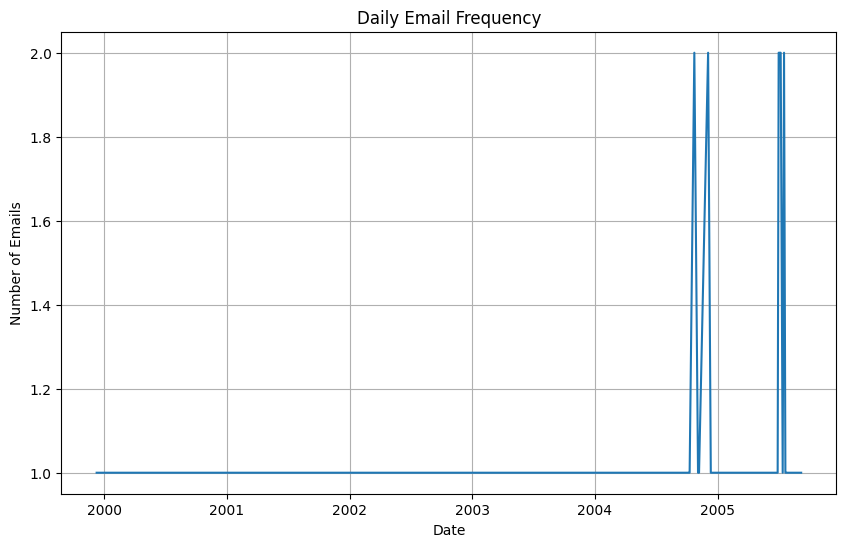

In [5]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define the API endpoint and parameters
url = "https://datasets-server.huggingface.co/rows"
params = {
    "dataset": "SetFit/enron_spam",
    "config": "default",
    "split": "test",
    "offset": 0,
    "length": 100
}

# Make GET request to fetch the dataset
response = requests.get(url, params=params)

# Check if request was successful
if response.status_code != 200:
    print(f"Failed to fetch dataset. Status code: {response.status_code}")
    exit()

# Load dataset into a DataFrame
json_response = response.json()

# Extract rows from the response
rows = json_response['rows']
data = [row['row'] for row in rows]
email_df = pd.DataFrame(data)

# Convert 'date' column to datetime, handle errors by setting invalid parsing as NaT (Not a Time)
email_df['date'] = pd.to_datetime(email_df['date'], errors='coerce')

# Drop rows where 'date' could not be parsed
email_df = email_df.dropna(subset=['date'])

# Extract day of the week and month from the 'date' column
email_df['DayOfWeek'] = email_df['date'].dt.dayofweek
email_df['Month'] = email_df['date'].dt.month

# Additional feature: length of the subject
email_df['SubjectLength'] = email_df['subject'].apply(lambda x: len(str(x)) if pd.notna(x) else 0)

# Additional feature: presence of common spam words in subject
spam_keywords = ['free', 'win', 'winner', 'prize', 'urgent', 'important', 'buy', 'purchase']
email_df['SpamWords'] = email_df['subject'].apply(lambda x: sum([1 for word in spam_keywords if word in str(x).lower()]))

# Function to extract features
def extract_features(df):
    # Extract day of the week, month, subject length, and spam words as features
    features = df[['DayOfWeek', 'Month', 'SubjectLength', 'SpamWords']]
    return features

# Extract features
X = extract_features(email_df)
y = email_df['label_text'].map({'spam': 1, 'ham': 0})

# Drop any rows in X or y that have missing values
X = X.dropna()
y = y.loc[X.index]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a classifier (Random Forest as an example)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Perform cross-validation
cv_scores = cross_val_score(clf, X, y, cv=5)
print("Cross-validation accuracy scores:", cv_scores)
print("Mean cross-validation accuracy:", cv_scores.mean())

# Print temporal patterns
print("\nTemporal Patterns (Day of the Week):")
print(X_test['DayOfWeek'].value_counts().sort_index())

print("\nTemporal Patterns (Month):")
print(X_test['Month'].value_counts().sort_index())


# Email frequency analysis
email_df['Date'] = email_df['date'].dt.date  # Extract date without time
daily_counts = email_df['Date'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(daily_counts.index, daily_counts.values)
plt.title('Daily Email Frequency')
plt.xlabel('Date')
plt.ylabel('Number of Emails')
plt.grid(True)
plt.show()
